In [1]:
import qiskit
import numpy as np, matplotlib.pyplot as plt
import sys
sys.path.insert(1, '../')
import qtm.base, qtm.constant, qtm.ansatz, qtm.fubini_study

In [9]:
num_qubits = 4
num_layers = 2

In [10]:
thetas = np.ones((num_layers*num_qubits*3))
psi = np.asarray([ 0.48218629,  0.13453172, -0.42581437, -0.49254125,  0.44481832,
        0.16791415, -0.25851379, -0.18054072])
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc.initialize(psi, range(0, num_qubits))

thetas, loss_values_sgd = qtm.base.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.ansatz.u_cluster_nlayer_nqubit, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.loss.loss_basis,
    optimizer = qtm.optimizer.sgd,
    verbose = 1,
    num_layers = num_layers
)

QiskitError: 'Sum of amplitudes-squared does not equal one.'

In [4]:
thetas = np.ones((num_layers*num_qubits*3))
thetas, loss_values_adam = qtm.base.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.ansatz.u_cluster_nlayer_nqubit, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.loss.loss_basis,
    optimizer = qtm.optimizer.adam,
    verbose = 1,
    num_layers = num_layers
)

Step: 100%|██████████| 100/100 [10:58<00:00,  6.58s/it]


In [5]:
thetas = np.ones((num_layers*num_qubits*3))
thetas, loss_values_qfsm = qtm.base.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.ansatz.u_cluster_nlayer_nqubit, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.loss.loss_basis,
    optimizer = qtm.optimizer.qng_fubini_study,
    verbose = 1,
    num_layers = num_layers
)

Step: 100%|██████████| 100/100 [27:03<00:00, 16.23s/it]


In [6]:
thetas = np.ones((num_layers*num_qubits*3))
thetas, loss_values_qfim = qtm.base.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.ansatz.u_cluster_nlayer_nqubit, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.loss.loss_basis,
    optimizer = qtm.optimizer.qng_qfim,
    verbose = 1,
    num_layers = num_layers
)

Step: 100%|██████████| 100/100 [15:32<00:00,  9.32s/it]


In [7]:
thetas = np.ones((num_layers*num_qubits*3))
thetas, loss_values_adam_qfim = qtm.base.fit(
    qc, num_steps = 100, thetas = thetas, 
    create_circuit_func = qtm.ansatz.u_cluster_nlayer_nqubit, 
    grad_func = qtm.base.grad_loss,
    loss_func = qtm.loss.loss_basis,
    optimizer = qtm.optimizer.qng_adam,
    verbose = 1,
    num_layers = num_layers
)

Step: 100%|██████████| 100/100 [13:12<00:00,  7.93s/it]


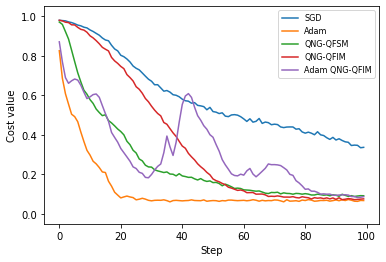

In [8]:
plt.plot(loss_values_sgd, label="SGD")
plt.plot(loss_values_adam, label="Adam")
plt.plot(loss_values_qfsm, label="QNG-QFSM")
plt.plot(loss_values_qfim, label="QNG-QFIM")
plt.plot(loss_values_adam_qfim, label="Adam QNG-QFIM")
plt.xlabel("Step")
plt.ylabel("Cost value")
plt.ylim(-0.05, 1.05)
plt.legend(prop={'size': 8}, loc=1)
plt.savefig(str(num_qubits) + '.svg', format='svg')
plt.show()